### Script for reading data for Problem 4.1 (data_GripStrength.txt) in Applied Statistics 2022 problem set:

This script reads the file __"data_GripStrength.txt"__ for Problem 4.1 in the problem set of Applied Statistics 2022/23. This data files contains 84 entries in three columns: 

* **dominant hand** (0 - left hand, 1 - right hand),
* **grip strength** (N) of the dominant hand,
* **grip strength** (N) of the non-dominant hand.

####  Author: 
- Troels Petersen (Niels Bohr Institute, petersen@nbi.dk)

####  Date:   
 - 1st of December 2022

In [1]:
import pandas as pd
import numpy as np                                     # Matlab like syntax for linear algebra and functions
from numpy.linalg import matrix_power                  # This is to raise matrices to powers
import matplotlib.pyplot as plt                        # Plots and figures like you know them from Matlab
import seaborn as sns                                  # Make the plots nicer to look at
from iminuit import Minuit                             # The actual fitting tool, better than scipy's
import sys                                             # Module to see files and folders in directories
from scipy import stats
import sympy as sp
sys.path.append('../External_Functions')
from ExternalFunctions import UnbinnedLH, BinnedLH, Chi2Regression

In [2]:
dataframe = pd.read_csv('data_GripStrength.csv', header=0, index_col=None)
domhand, dom_grip, ndom_grip = dataframe.values.T
dataframe

,DominantHand,DominantGrip(N),NonDominantGrip(N)
0,1.0,293.24,241.50
1,1.0,547.39,552.01
2,0.0,578.85,495.98
3,1.0,342.30,342.18
4,1.0,337.79,347.14
...,...,...,...
79,1.0,335.67,305.39
80,1.0,362.91,336.60
81,1.0,659.39,623.32
82,1.0,292.84,254.46


Print the first 10 entries to check the content of the file and access of data:

In [3]:
for i in range(10):
    print(f"  dominant hand = {domhand[i]:4.2f}    dominant grip = {dom_grip[i]:6.2f} N    non-dominant grip = {ndom_grip[i]:6.2f} N")

  dominant hand = 1.00    dominant grip = 293.24 N    non-dominant grip = 241.50 N
  dominant hand = 1.00    dominant grip = 547.39 N    non-dominant grip = 552.01 N
  dominant hand = 0.00    dominant grip = 578.85 N    non-dominant grip = 495.98 N
  dominant hand = 1.00    dominant grip = 342.30 N    non-dominant grip = 342.18 N
  dominant hand = 1.00    dominant grip = 337.79 N    non-dominant grip = 347.14 N
  dominant hand = 0.00    dominant grip = 510.41 N    non-dominant grip = 493.16 N
  dominant hand = 0.00    dominant grip = 188.86 N    non-dominant grip = 212.97 N
  dominant hand = 0.00    dominant grip = 537.67 N    non-dominant grip = 497.41 N
  dominant hand = 0.00    dominant grip = 235.56 N    non-dominant grip = 228.56 N
  dominant hand = 1.00    dominant grip = 217.30 N    non-dominant grip = 218.23 N


In [8]:
# What fraction of people are right handed?
frac_r = sum(domhand == 1)/len(domhand)
print(f"Fraction of people who are right handed = {frac_r:4.2f}")

# What is the mean strength of the dominant hand?
mean_dom_grip = sum(dom_grip)/len(dom_grip)
print(f"Mean dominant grip strength = {mean_dom_grip:6.2f} N")
std_dom_grip = np.std(dom_grip)
print(f"Standard deviation of dominant grip strength = {std_dom_grip:6.2f} N")
er_mean_dom_grip = std_dom_grip/np.sqrt(len(dom_grip))
print(f"Error on mean dominant grip strength = {er_mean_dom_grip:6.2f} N")

# What is the mean strength of the non-dominant hand?
mean_ndom_grip = sum(ndom_grip)/len(ndom_grip)
print(f"Mean non-dominant grip strength = {mean_ndom_grip:6.2f} N")
std_ndom_grip = np.std(ndom_grip)
print(f"Standard deviation of non-dominant grip strength = {std_ndom_grip:6.2f} N")
er_mean_ndom_grip = std_ndom_grip/np.sqrt(len(ndom_grip))
print(f"Error on mean non-dominant grip strength = {er_mean_ndom_grip:6.2f} N")

Fraction of people who are right handed = 0.81
Mean dominant grip strength = 444.93 N
Standard deviation of dominant grip strength = 144.14 N
Error on mean dominant grip strength =  15.73 N
Mean non-dominant grip strength = 418.48 N
Standard deviation of non-dominant grip strength = 137.39 N
Error on mean non-dominant grip strength =  14.99 N


In [5]:
stats.ttest_ind(dom_grip, ndom_grip, equal_var=False)


Ttest_indResult(statistic=1.2100636494909534, pvalue=0.2279787070360244)

Mean grip difference =  26.45 N
Standard deviation of grip difference =  29.03 N
Error on mean grip difference =   3.17 N


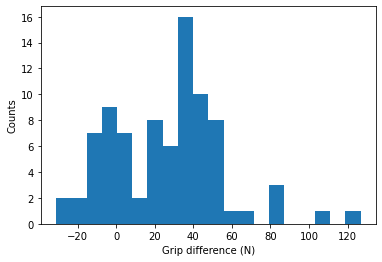

In [12]:
grip_diff = dom_grip - ndom_grip
plt.hist(grip_diff, bins=20)
plt.xlabel("Grip difference (N)")
plt.ylabel("Counts")


mean_grip_diff = sum(grip_diff)/len(grip_diff)
std_grip_diff = np.std(grip_diff)
er_mean_grip_diff = std_grip_diff/np.sqrt(len(grip_diff))
print(f"Mean grip difference = {mean_grip_diff:6.2f} N")
print(f"Standard deviation of grip difference = {std_grip_diff:6.2f} N")
print(f"Error on mean grip difference = {er_mean_grip_diff:6.2f} N")

In [7]:
stats.ttest_1samp(grip_diff, 0)

Ttest_1sampResult(statistic=8.299203578908527, pvalue=1.6469976908961062e-12)

So the Null hypothesis is that the mean of the grip strength of the dominant hand is equal to the mean of the grip strength of the non-dominant hand. With such a low p-value the null hypothesis is rejected and we can conclude that the grip strength of the dominant hand is statistically not equal to the grip strength of the non-dominant hand.